# Instacart Basket Data Analysis

In [1]:
#This script contains the following points:
#### 1. Import Libraries & Data
#### 2. Personally Identifiable Information (PII) data 
#### 3. Geographic segmentation
#### 4. Low-activity customer
#### 5. Customer profilling
#### 6. Distribution of customer profile
#### 7. Statistics on customer-profile level for order frequency and expenditures
#### 8. Customer analysis by region
#### 9. Visualizations

## O1. Import Libraries & Data

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Import Data..
# Creating a path
path = r'C:\Users\Dell\Documents\Instacart Basket Analysis'

In [4]:
# Import ords_prods_merge dataframe.
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [5]:
column_names = ords_prods_merge.columns.tolist()
print(column_names)

['product_id', 'product_name', 'aisle_id', 'department_id', 'prices', 'order_id', 'user_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order', 'reordered', '_merge', 'price_range_loc', 'busiest_day', 'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag', 'mean_product_price', 'spending_flag', 'median_days_between_orders', 'order_frequency', 'first_name', 'surname', 'Gender', 'State', 'Age', 'date_joined', 'dependants', 'family_status', 'income']


In [6]:
# Import product department index
department_index = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'), index_col = False)

In [7]:
department_index

,dep_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


## 02. Personally Identifiable Information (PII) data

#### The dataset comprises personally identifiable information (PII) like First_name,surname, gender, age, number of dependants, family status, and income

 ## 03. Geographic segmentation

### Defing Regions

In [8]:
# Defining West states
west_states = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [9]:
# Assign Region
ords_prods_merge.loc[ords_prods_merge['State'].isin(west_states), 'region'] = 'West' 

In [10]:
# Define Midwest states
mid_west_states = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [11]:
# Assign Region
ords_prods_merge.loc[ords_prods_merge['State'].isin(mid_west_states), 'region'] = 'Midwest'

In [12]:
# Define South states
west_states = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [13]:
# Assign Region
ords_prods_merge.loc[ords_prods_merge['State'].isin(west_states), 'region'] = 'South'

In [14]:
# Define Northeast states
northeast_states = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']

In [15]:
# Assign Region
ords_prods_merge.loc[ords_prods_merge['State'].isin(northeast_states), 'region'] = 'Northeast'

In [16]:
# Value count by region
ords_prods_merge['region'].value_counts(dropna = False)

region
South        2157346
West         1658769
Midwest      1520604
Northeast    1144756
Name: count, dtype: int64

### Spending habbits by region

In [17]:
# Determining whether there’s a difference in spending habits between the different U.S. regions.
# crossing the variable 'region' with the spending flag.
spend_by_region = pd.crosstab(ords_prods_merge['region'], ords_prods_merge['spending_flag'], dropna = False).sort_values(by = 'High spender', ascending = False)

In [18]:
# Spending by Region
spend_by_region 

spending_flag,High spender,Low spender
region,,
South,41919,2115427
West,31866,1626903
Midwest,31275,1489329
Northeast,21652,1123104


In [19]:
# crossing the variable 'region' with the product prices
price_region = pd.crosstab(ords_prods_merge['region'], ords_prods_merge['price_range_loc'], dropna = False).sort_values(by = 'High-range product', ascending = False)

In [20]:
# Price rang product preferance by region
price_region 

price_range_loc,High-range product,Low-range product,Mid-range product
region,,,
South,27875,672650,1456821
West,21658,518165,1118946
Midwest,19608,474206,1026790
Northeast,14616,358841,771299


#### The South region stands out as having both the highest and lowest spenders, with the West region following closely behind. This indicates notable diversity in spending habits within the South, accommodating both high and low spenders. Similarly, the Midwest region displays a comparable trend, albeit not as pronounced. This observation emphasizes the significance of regional factors in shaping consumer spending behaviors, emphasizing the potential for tailored marketing approaches or region-specific initiatives

## 04. Low-activity customers

In [21]:
# Define low_activity customers
ords_prods_merge.loc[ords_prods_merge['order_number'] < 5, 'customer_activity'] = 'low_activity customers'

In [22]:
# Define high_activity customers
ords_prods_merge.loc[ords_prods_merge['order_number'] >= 5, 'customer_activity'] = 'high_activity customer'

In [23]:
# Value count based on activity level
ords_prods_merge['customer_activity'].value_counts(dropna= False)

customer_activity
high_activity customer    4884337
low_activity customers    1597138
Name: count, dtype: int64

In [24]:
# Creating exclusion flag
ords_prods_merge['exclusion_flag'] = ords_prods_merge['max_order'] < 5

In [25]:
# Creating new data set with orders =<5
df_exclusion = ords_prods_merge.loc[ords_prods_merge['exclusion_flag'] == False]
low_activity = ords_prods_merge.loc[ords_prods_merge['exclusion_flag'] == True]

In [26]:
# Creating new data set with orfers >5
df_order_less_5 = ords_prods_merge[ords_prods_merge['exclusion_flag']]

In [27]:
# exporting dataset sample as pickle format
df_order_less_5.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_order_less_5.pkl'))

## 05. Customer Profiling

#### The age column has been divided into three groups for analysis: 'young adult' (ages 18-40), 'middle age' (ages 40-60), and 'senior' (ages 60-81). Similarly, the income column is separated into four tiers based on statistical percentiles: 'low income' (ranging from 25093 to 67124), 'lower middle class' (from 67124 to 96663), 'upper middle class' (from 96663 to 127961), and 'upper class' (from 127961 to 593901). These two dimensions are combined to create customer profiles, resulting in a total of 12 groups in the customer profile.

### Define Age & Income groups

In [28]:
# Define low-income young adult group
ords_prods_merge.loc[(ords_prods_merge['Age'] >= 18) & (ords_prods_merge['Age'] <= 40) 
         & (ords_prods_merge['income'] >= 25903) & (ords_prods_merge['income'] <= 67124),
      
         'customer_profile'] = 'low-income yound adult'

In [29]:
# Define low-income mid age group
ords_prods_merge.loc[(ords_prods_merge['Age'] > 40) & (ords_prods_merge['Age'] <= 60) 
         & (ords_prods_merge['income'] >= 25903) & (ords_prods_merge['income'] <= 67124),
      
         'customer_profile'] = 'low-income mid age'

In [30]:
# Define low-income senior group
ords_prods_merge.loc[(ords_prods_merge['Age'] > 60) &  (ords_prods_merge['Age'] <= 81  )
         & (ords_prods_merge['income'] >= 25903) & (ords_prods_merge['income'] <= 67124),
      
         'customer_profile'] = 'low-ncome senior'

In [31]:
# Define lower-middle-class young adult group
ords_prods_merge.loc[(ords_prods_merge['Age'] >= 18) & (ords_prods_merge['Age'] <= 40) 
         & (ords_prods_merge['income'] > 67124) & (ords_prods_merge['income'] <= 96663),
      
         'customer_profile'] = 'lower-middle-class yound adult'

In [32]:
# Define loer-middle-class mid age group
ords_prods_merge.loc[(ords_prods_merge['Age'] > 40) & (ords_prods_merge['Age'] <= 60) 
         & (ords_prods_merge['income'] > 67124 ) & (ords_prods_merge['income'] <= 96663 ),
      
         'customer_profile'] = 'lower-middle-class mid age'

In [33]:
# Define lower-middle-class seniot group
ords_prods_merge.loc[(ords_prods_merge['Age'] > 60) &  (ords_prods_merge['Age'] <= 81  )
         & (ords_prods_merge['income'] > 67124 ) & (ords_prods_merge['income'] <= 96663 ),
      
         'customer_profile'] = 'lower-middle-class senior'

In [34]:
# Define upper-middle-class yound adult group
ords_prods_merge.loc[(ords_prods_merge['Age'] >= 18) & (ords_prods_merge['Age'] <= 40) 
         & (ords_prods_merge['income'] > 96663 ) & (ords_prods_merge['income'] <= 127961 ),
      
         'customer_profile'] = 'upper-middle-class yound adult'

In [35]:
# Define upper-middle-class mid age group
ords_prods_merge.loc[(ords_prods_merge['Age'] > 40) & (ords_prods_merge['Age'] <= 60) 
         & (ords_prods_merge['income'] > 96663 ) & (ords_prods_merge['income'] <= 127961 ),
      
         'customer_profile'] = 'upper-middle-class mid age'

In [36]:
# Define upper-middle-class senior group
ords_prods_merge.loc[(ords_prods_merge['Age'] > 60) &  (ords_prods_merge['Age'] <= 81  )
         & (ords_prods_merge['income'] > 96663 ) & (ords_prods_merge['income'] <= 127961 ),
      
         'customer_profile'] = 'upper-middle-class senior'

In [37]:
# Define upper-class young adult group
ords_prods_merge.loc[(ords_prods_merge['Age'] >= 18) & (ords_prods_merge['Age'] <= 40) 
         & (ords_prods_merge['income'] > 127961 ) & (ords_prods_merge['income'] <= 593901 ),
      
         'customer_profile'] = 'upper-class young adult'

In [38]:
# Define upper-class mid age group
ords_prods_merge.loc[(ords_prods_merge['Age'] > 40) & (ords_prods_merge['Age'] <= 60) 
         & (ords_prods_merge['income'] > 127961 ) & (ords_prods_merge['income'] <= 593901 ),
      
         'customer_profile'] = 'upper-class mid age'

In [39]:
# Define upper-class senior group
ords_prods_merge.loc[(ords_prods_merge['Age'] > 60) &  (ords_prods_merge['Age'] <= 81  )
         & (ords_prods_merge['income'] > 127961 ) & (ords_prods_merge['income'] <= 593901 ),
      
         'customer_profile'] = 'upper-class senior'

In [40]:
### Family status and dependant's number with profile
# Familiy status count by customer profile
prof_fam = pd.crosstab(ords_prods_merge['customer_profile'], ords_prods_merge['family_status'], dropna = False)
prof_fam

family_status,divorced/widowed,living with parents and siblings,married,single
customer_profile,,,,
low-income mid age,2868,0,204547,64172
low-income yound adult,0,138796,669664,270932
low-ncome senior,67934,0,208544,0
lower-middle-class mid age,2880,0,196595,60645
lower-middle-class senior,72311,0,211165,0
lower-middle-class yound adult,0,147579,660051,264255
upper-class mid age,9346,0,581584,189047
upper-class senior,202794,0,608278,0
upper-class young adult,0,3615,17060,6035


In [41]:
# Number of dependants by customer profile
cust_dependants = pd.crosstab(ords_prods_merge['customer_profile'], ords_prods_merge['dependants'], dropna = False)
cust_dependants

dependants,0,1,2,3
customer_profile,,,,
low-income mid age,67040,68405,65790,70352
low-income yound adult,270932,267717,270310,270433
low-ncome senior,67934,70027,70124,68393
lower-middle-class mid age,63525,67328,62450,66817
lower-middle-class senior,72311,67972,74287,68906
lower-middle-class yound adult,264255,271338,267587,268705
upper-class mid age,198393,195676,189087,196821
upper-class senior,202794,197989,207022,203267
upper-class young adult,6035,6679,7258,6738


## 06. Distribution of customer profile

In [42]:
# Distribution of customer profile
ords_prods_merge['customer_profile'].value_counts()

customer_profile
low-income yound adult            1079392
lower-middle-class yound adult    1071885
upper-class senior                 811072
upper-class mid age                779977
upper-middle-class senior          744830
upper-middle-class mid age         720102
lower-middle-class senior          283476
low-ncome senior                   276478
low-income mid age                 271587
lower-middle-class mid age         260120
upper-middle-class yound adult     155846
upper-class young adult             26710
Name: count, dtype: int64

Text(0.5, 0, 'User Count')

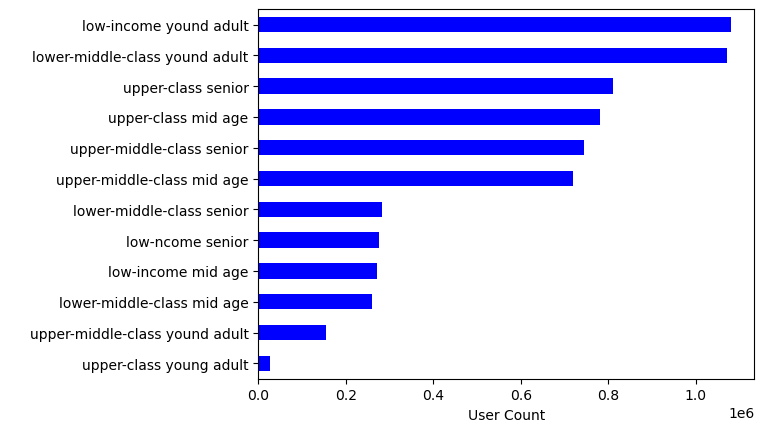

In [43]:
# Visualize the distribution of customer profile
ords_prods_merge['customer_profile'].value_counts(dropna= False).sort_values(ascending= True).plot.barh(color= 'blue')
plt.ylabel(' ') # Eliminate y lable
plt.xlabel('User Count')

## 07. Statistics on customer-profile level for order frequency and expenditures

In [44]:
# Order frequency by customer profile
freqt_customer_profile = ords_prods_merge.groupby('customer_profile').agg({'days_since_prior_order': ['mean','min','max']})


In [45]:
freqt_customer_profile

days_since_prior_order           
                                                 mean  min   max
customer_profile                                                
low-income mid age                          11.490858  0.0  30.0
low-income yound adult                      11.210049  0.0  30.0
low-ncome senior                            11.642042  0.0  30.0
lower-middle-class mid age                  11.084561  0.0  30.0
lower-middle-class senior                   10.964556  0.0  30.0
lower-middle-class yound adult              10.987772  0.0  30.0
upper-class mid age                         11.101352  0.0  30.0
upper-class senior                          10.972344  0.0  30.0
upper-class young adult                     10.467877  0.0  30.0
upper-middle-class mid age                  11.017755  0.0  30.0
upper-middle-class senior                   11.076697  0.0  30.0
upper-middle-class yound adult              11.313995  0.0  30.0

In [46]:
# Expenditure by customer profile
price_customer_profile = ords_prods_merge.groupby('customer_profile').agg({'prices': ['mean', 'min', 'max']})

In [47]:
price_customer_profile

prices              
                                      mean  min      max
customer_profile                                        
low-income mid age                6.673979  1.0     25.0
low-income yound adult            7.594639  1.0     25.0
low-ncome senior                  6.705643  1.0     25.0
lower-middle-class mid age        9.177806  1.0  99999.0
lower-middle-class senior         9.094793  1.0  99999.0
lower-middle-class yound adult    8.435775  1.0  99999.0
upper-class mid age              18.252521  1.0  99999.0
upper-class senior               17.132664  1.0  99999.0
upper-class young adult         295.362666  1.0  99999.0
upper-middle-class mid age        9.042237  1.0  99999.0
upper-middle-class senior         8.477825  1.0  99999.0
upper-middle-class yound adult   22.290582  1.0  99999.0

## 08. Customer analysis by region

### The South

In [48]:
# Creat subset for the South region
south_customer = ords_prods_merge[ords_prods_merge['region']== 'South']

In [49]:
# value count for the South region 
south_customer['user_id'].value_counts().sum()

2157346

In [50]:
# value count by customer profile 
south_customer['customer_profile'].value_counts()

customer_profile
lower-middle-class yound adult    364158
low-income yound adult            362902
upper-class senior                268793
upper-class mid age               253244
upper-middle-class senior         244096
upper-middle-class mid age        231724
lower-middle-class senior          97225
low-ncome senior                   92141
low-income mid age                 90389
lower-middle-class mid age         89738
upper-middle-class yound adult     52956
upper-class young adult             9980
Name: count, dtype: int64

In [51]:
# Family status count
south_customer['family_status'].value_counts()

family_status
married                             1511102
single                               356182
divorced/widowed                     184297
living with parents and siblings     105765
Name: count, dtype: int64

In [52]:
# Number of dependant count
south_customer['dependants'].value_counts()

dependants
2    543957
3    540582
0    540479
1    532328
Name: count, dtype: int64

In [53]:
# Total spending of the South customers
south_customer['prices'].sum()

26968897.999999996

In [54]:
# Customer spending statistics
south_customer['prices'].describe()

count    2.157346e+06
mean     1.250096e+01
std      5.320273e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [55]:
# Spending habbits outlook
south_customer['spending_flag'].value_counts(dropna= False)

spending_flag
Low spender     2115427
High spender      41919
Name: count, dtype: int64

### Favorite goods and department

In [56]:
# Top 10 goods by order
south_customer['product_name'].value_counts(dropna =  False ).sort_values(ascending = False).head(10)

product_name
Banana                    31541
Bag of Organic Bananas    25030
Organic Strawberries      17929
Organic Baby Spinach      16423
Organic Hass Avocado      13991
Organic Avocado           11761
Large Lemon                9907
Strawberries               9591
Organic Raspberries        9249
Limes                      9218
Name: count, dtype: int64

In [57]:
# The most counts of order by departments
south_customer['department_id'].value_counts(dropna= False).sort_values(ascending = False).head(5)

department_id
4     631034
16    359089
19    191871
7     179646
1     149804
Name: count, dtype: int64

In [58]:
# Set data dictionary
department_index.set_index('dep_id', inplace=True)
dept_dict = department_index.to_dict('index') 

In [59]:
print(dept_dict.get(4))

{'department': 'produce'}


In [60]:
print(dept_dict.get(16))

{'department': 'dairy eggs'}


In [61]:
print(dept_dict.get(19))

{'department': 'snacks'}


#### Produce, dairy eggs and snacks are the top 3 popular departments for order

### Order habbits 

In [62]:
# Brand loyalty check
south_customer['loyalty_flag'].value_counts(dropna= False)

loyalty_flag
Regular customer    1061962
Loyal customer       680801
New customer         414583
Name: count, dtype: int64

In [63]:
# Order frequency check
south_customer['order_frequency'].value_counts(dropna= False)

order_frequency
Frequent customer        1436934
Regular customer          477152
Non-frequent customer     243258
nan                            2
Name: count, dtype: int64

In [64]:
nan_rows = south_customer[south_customer['order_frequency'].isna()]
print(nan_rows)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id, prices, order_id, user_id, order_number, orders_day_of_week, order_hour_of_day, days_since_prior_order, add_to_cart_order, reordered, _merge, price_range_loc, busiest_day, busiest_days, busiest_period_of_day, max_order, loyalty_flag, mean_product_price, spending_flag, median_days_between_orders, order_frequency, first_name, surname, Gender, State, Age, date_joined, dependants, family_status, income, region, customer_activity, exclusion_flag, customer_profile]
Index: []

[0 rows x 37 columns]


In [65]:
ords_prods_merge['order_frequency'].value_counts(dropna= False)

order_frequency
Frequent customer        4310528
Regular customer         1442957
Non-frequent customer     727988
nan                            2
Name: count, dtype: int64

In [66]:
ords_prods_merge.dropna(subset=['order_frequency'], inplace=True)

In [67]:
nan_rows = ords_prods_merge[ords_prods_merge['order_frequency'].isna()]
print(nan_rows)

Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id, prices, order_id, user_id, order_number, orders_day_of_week, order_hour_of_day, days_since_prior_order, add_to_cart_order, reordered, _merge, price_range_loc, busiest_day, busiest_days, busiest_period_of_day, max_order, loyalty_flag, mean_product_price, spending_flag, median_days_between_orders, order_frequency, first_name, surname, Gender, State, Age, date_joined, dependants, family_status, income, region, customer_activity, exclusion_flag, customer_profile]
Index: []

[0 rows x 37 columns]


In [68]:
nan_count = ords_prods_merge['order_frequency'].isna().sum()
print("Number of NaN values in 'order_frequency' column:", nan_count)

Number of NaN values in 'order_frequency' column: 0


In [69]:
nan_count_string = ords_prods_merge['order_frequency'].astype(str).str.lower().str.strip().eq('nan').sum()
print("Number of 'nan' string values in 'order_frequency' column:", nan_count_string)

Number of 'nan' string values in 'order_frequency' column: 2


In [70]:
ords_prods_merge['order_frequency'].replace('nan', np.nan, inplace=True)

In [71]:
ords_prods_merge['order_frequency'].value_counts(dropna= False)

order_frequency
Frequent customer        4310528
Regular customer         1442957
Non-frequent customer     727988
NaN                            2
Name: count, dtype: int64

In [72]:
ords_prods_merge.dropna(subset=['order_frequency'], inplace=True)

In [73]:
ords_prods_merge['order_frequency'].value_counts(dropna= False)

order_frequency
Frequent customer        4310528
Regular customer         1442957
Non-frequent customer     727988
Name: count, dtype: int64

In [74]:
# Create a subset to analyze customer ordering habbits.
user_ord_hab = ords_prods_merge[['user_id','region','Age','income','product_name','department_id','family_status','loyalty_flag','order_frequency','price_range_loc','spending_flag','orders_day_of_week','customer_activity','customer_profile']]

In [75]:
user_ord_hab['order_frequency'].value_counts(dropna= False)

order_frequency
Frequent customer        4310528
Regular customer         1442957
Non-frequent customer     727988
Name: count, dtype: int64

In [76]:
nan_count = user_ord_hab['order_frequency'].isna().sum()
print("Number of NaN values in 'order_frequency' column:", nan_count)

Number of NaN values in 'order_frequency' column: 0


In [77]:
nan_count_string = user_ord_hab['order_frequency'].astype(str).str.lower().str.strip().eq('nan').sum()
print("Number of 'nan' string values in 'order_frequency' column:", nan_count_string)

Number of 'nan' string values in 'order_frequency' column: 0


In [78]:
user_ord_hab['order_frequency'].replace('nan', np.nan, inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14404\2823616324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_ord_hab['order_frequency'].replace('nan', np.nan, inplace=True)


In [79]:
user_ord_hab['order_frequency'].value_counts(dropna= False)

order_frequency
Frequent customer        4310528
Regular customer         1442957
Non-frequent customer     727988
Name: count, dtype: int64

In [80]:
user_ord_hab = ords_prods_merge.copy()
user_ord_hab.dropna(subset=['order_frequency'], inplace=True)

In [81]:
user_ord_hab['order_frequency'].value_counts(dropna= False)

order_frequency
Frequent customer        4310528
Regular customer         1442957
Non-frequent customer     727988
Name: count, dtype: int64

In [82]:
south_customer.dropna(subset=['order_frequency'], inplace=True)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14404\765217000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_customer.dropna(subset=['order_frequency'], inplace=True)


In [83]:
# Order frequency check
south_customer['order_frequency'].value_counts(dropna= False)

order_frequency
Frequent customer        1436934
Regular customer          477152
Non-frequent customer     243258
nan                            2
Name: count, dtype: int64

In [84]:
# The number of order check
south_customer['customer_activity'].value_counts(dropna= False)

customer_activity
high_activity customer    1625428
low_activity customers     531918
Name: count, dtype: int64

### The West

In [85]:
# Create subset for the West region
west_customer = ords_prods_merge.loc[ords_prods_merge['region'] == 'West']

In [86]:
# User count of the West region 
west_customer['user_id'].value_counts().sum()


1658769

In [87]:
# Customer profile count
west_customer['customer_profile'].value_counts()

customer_profile
low-income yound adult            277041
lower-middle-class yound adult    268651
upper-class senior                205264
upper-class mid age               201970
upper-middle-class senior         191837
upper-middle-class mid age        185190
lower-middle-class senior          73670
low-ncome senior                   70551
low-income mid age                 70245
lower-middle-class mid age         68586
upper-middle-class yound adult     39917
upper-class young adult             5847
Name: count, dtype: int64

In [88]:
# Marriage status count
west_customer['family_status'].value_counts()

family_status
married                             1166839
single                               273696
divorced/widowed                     141043
living with parents and siblings      77191
Name: count, dtype: int64

In [89]:
# Number of dependant count
west_customer['dependants'].value_counts()

dependants
3    422248
0    414739
2    411047
1    410735
Name: count, dtype: int64

### Spending habbits

In [90]:
# Total spending of the South customers
west_customer['prices'].sum()

18743541.30000001

In [91]:
# Customer spending statistics
west_customer['prices'].describe()

count    1.658769e+06
mean     1.129967e+01
std      4.366828e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [92]:
# Spending habbits outlook
west_customer['spending_flag'].value_counts(dropna= False)

spending_flag
Low spender     1626903
High spender      31866
Name: count, dtype: int64

### favorite goods

In [93]:
# Top 10 goods by order
west_customer['product_name'].value_counts(dropna =  False ).sort_values(ascending = False).head(10)

product_name
Banana                    24080
Bag of Organic Bananas    19321
Organic Strawberries      13579
Organic Baby Spinach      12435
Organic Hass Avocado      11356
Organic Avocado            8961
Large Lemon                7674
Strawberries               7282
Limes                      7182
Organic Whole Milk         7079
Name: count, dtype: int64

In [94]:
# The most counts of order by departments
west_customer['department_id'].value_counts(dropna= False).sort_values(ascending = False).head(5)

department_id
4     484901
16    277241
19    148570
7     136097
1     114182
Name: count, dtype: int64

#### Produce, dairy eggs and snacks are the top 3 popular departments.

### Order Habits

In [95]:
# Brand loyalty check
west_customer['loyalty_flag'].value_counts(dropna= False)

loyalty_flag
Regular customer    806740
Loyal customer      532234
New customer        319795
Name: count, dtype: int64

In [96]:
# Order frequency check
west_customer['order_frequency'].value_counts(dropna= False)

order_frequency
Frequent customer        1109248
Regular customer          364105
Non-frequent customer     185416
Name: count, dtype: int64

In [97]:
# The number of order check
west_customer['customer_activity'].value_counts(dropna= False)

customer_activity
high_activity customer    1252175
low_activity customers     406594
Name: count, dtype: int64

### The Midwest

In [98]:
# Create subset for the Mid-west region
midwest_customer = ords_prods_merge.loc[ords_prods_merge['region'] == 'Midwest']

In [99]:
# Count the number of users 
midwest_customer['user_id'].value_counts().sum()

1520604

In [100]:
# Customer profile count
midwest_customer['customer_profile'].value_counts()

customer_profile
low-income yound adult            250386
lower-middle-class yound adult    248894
upper-class senior                190429
upper-class mid age               189153
upper-middle-class senior         177003
upper-middle-class mid age        172966
low-ncome senior                   63849
low-income mid age                 63470
lower-middle-class senior          62462
lower-middle-class mid age         58370
upper-middle-class yound adult     37554
upper-class young adult             6068
Name: count, dtype: int64

In [101]:
# Marriage status count
midwest_customer['family_status'].value_counts()

family_status
married                             1065227
single                               251824
divorced/widowed                     130065
living with parents and siblings      73488
Name: count, dtype: int64

In [102]:
# Number of dependant count
midwest_customer['dependants'].value_counts()

dependants
1    385418
0    381889
2    378540
3    374757
Name: count, dtype: int64

### Spending Habits

In [103]:
# Total spending of the South customers
midwest_customer['prices'].sum()

19637247.900000006

In [104]:
# Spending habbits outlook
midwest_customer['spending_flag'].value_counts(dropna= False)

spending_flag
Low spender     1489329
High spender      31275
Name: count, dtype: int64

### Favorite Goods

In [105]:
# Top 10 goods by order
midwest_customer['product_name'].value_counts(dropna =  False ).sort_values(ascending = False).head(10)

product_name
Banana                    21976
Bag of Organic Bananas    17779
Organic Strawberries      12351
Organic Baby Spinach      11355
Organic Hass Avocado       9966
Organic Avocado            8455
Large Lemon                7414
Strawberries               6795
Limes                      6634
Organic Raspberries        6332
Name: count, dtype: int64

In [106]:
# The most counts of order by departments
midwest_customer['department_id'].value_counts(dropna= False).sort_values(ascending = False).head(5)

department_id
4     445839
16    252845
19    134620
7     125169
1     105356
Name: count, dtype: int64

#### Produce, dairy eggs and snacks are the top 3 popular departments.

### Order Habits

In [107]:
# Brand loyalty check
midwest_customer['loyalty_flag'].value_counts(dropna= False)

loyalty_flag
Regular customer    750464
Loyal customer      475136
New customer        295004
Name: count, dtype: int64

In [108]:
# Brand loyalty check
midwest_customer['loyalty_flag'].value_counts(dropna= False)

loyalty_flag
Regular customer    750464
Loyal customer      475136
New customer        295004
Name: count, dtype: int64

In [109]:
# The number of order check
midwest_customer['customer_activity'].value_counts(dropna= False)

customer_activity
high_activity customer    1143045
low_activity customers     377559
Name: count, dtype: int64

### The Northeast

In [110]:
# Create subset for the North-east region
northeast_customer = ords_prods_merge.loc[ords_prods_merge['region'] == 'Northeast']

In [111]:
# Count the number of users 
northeast_customer['user_id'].value_counts().sum()

1144756

In [112]:
# Customer profile count
northeast_customer['customer_profile'].value_counts()

customer_profile
lower-middle-class yound adult    190182
low-income yound adult            189063
upper-class senior                146586
upper-class mid age               135610
upper-middle-class senior         131894
upper-middle-class mid age        130222
lower-middle-class senior          50119
low-ncome senior                   49937
low-income mid age                 47483
lower-middle-class mid age         43426
upper-middle-class yound adult     25419
upper-class young adult             4815
Name: count, dtype: int64

In [113]:
# Marriage status count
northeast_customer['family_status'].value_counts()

family_status
married                             806916
single                              183469
divorced/widowed                    100551
living with parents and siblings     53820
Name: count, dtype: int64

In [114]:
# Number of dependant count
northeast_customer['dependants'].value_counts()

dependants
3    288802
1    288185
0    284020
2    283749
Name: count, dtype: int64

### Spending Habits

In [115]:
# Total spending of the South customers
northeast_customer['prices'].sum()

12843377.500000002

In [116]:
# Customer spending statistics
northeast_customer['prices'].describe()

count    1.144756e+06
mean     1.121931e+01
std      4.213592e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.120000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [117]:
# Spending habbits outlook
northeast_customer['spending_flag'].value_counts(dropna= False)

spending_flag
Low spender     1123104
High spender      21652
Name: count, dtype: int64

### Favorite Goods

In [118]:
# Top 10 goods by order
northeast_customer['product_name'].value_counts(dropna =  False ).sort_values(ascending = False).head(10)

product_name
Banana                    16579
Bag of Organic Bananas    13275
Organic Strawberries       9393
Organic Baby Spinach       8533
Organic Hass Avocado       7620
Organic Avocado            6393
Large Lemon                5442
Organic Whole Milk         5060
Limes                      4989
Strawberries               4948
Name: count, dtype: int64

In [119]:
# The most counts of order by departments
northeast_customer['department_id'].value_counts(dropna= False).sort_values(ascending = False).head(5)

department_id
4     333454
16    190515
19    103301
7      96870
1      77778
Name: count, dtype: int64

#### Produce, dairy eggs and snacks are the top 3 popular departm

### Order Habits

In [120]:
# Brand loyalty check
northeast_customer['loyalty_flag'].value_counts(dropna= False)

loyalty_flag
Regular customer    556282
Loyal customer      368853
New customer        219621
Name: count, dtype: int64

In [121]:
# Order frequency check
northeast_customer['order_frequency'].value_counts(dropna= False)

order_frequency
Frequent customer        760613
Regular customer         257819
Non-frequent customer    126324
Name: count, dtype: int64

In [122]:
# The number of order check
northeast_customer['customer_activity'].value_counts(dropna= False)

customer_activity
high_activity customer    863689
low_activity customers    281067
Name: count, dtype: int64

## 09. Visualizations

#### Odering Habitts with Ordering Time and Day

Text(0.5, 1.0, 'Histogram of Order Day of Week')

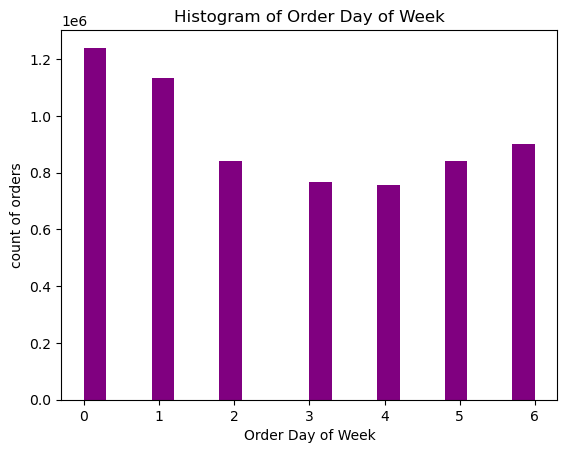

In [123]:
# Viz of the busiest day of week for order
busiest_dow = ords_prods_merge['orders_day_of_week'].plot.hist(bins = 20, color = 'purple')

plt.xlabel('Order Day of Week')  # Label for the x-axis
plt.ylabel('count of orders')  # Label for the y-axis
plt.title('Histogram of Order Day of Week') # Chart title

In [124]:
# Save figure
busiest_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_order_day_of_week.png'))

Text(0.5, 1.0, 'Histogram of Order Time of Day')

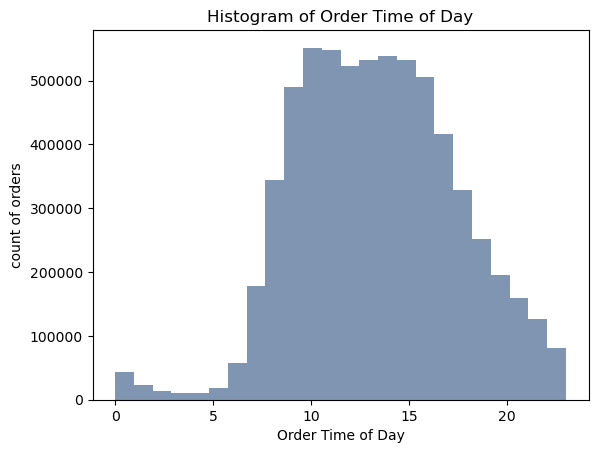

In [125]:
# Viz of the busiest hour of day for order
busiest_hod = ords_prods_merge['order_hour_of_day'].plot.hist(bins = 24, color = '#7f95b2')

plt.xlabel('Order Time of Day')  # Label for the x-axis
plt.ylabel('count of orders')  # Label for the y-axis
plt.title('Histogram of Order Time of Day')  # Title of the bar chart

In [126]:
# Save figure
busiest_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Hist_order_time_of_day.png'))

### Product Price with Day and Time

In [127]:
# Create Sample data
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

# Store 70% of the sample in the data frame big
big = ords_prods_merge[dev]
# Store 30% of the sample in the data frame small
small = ords_prods_merge[~dev] 

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Trend of Product Price with Order Time')

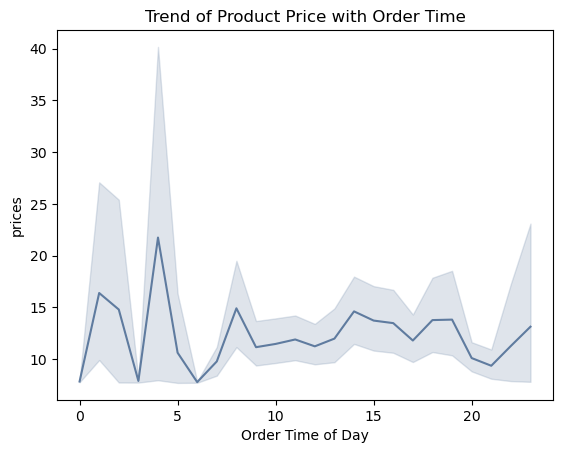

In [128]:
# Create line chart with random small sample data of the dataset to discover the insight of the price of goods and the order time of the day

tod_price = sns.lineplot(data = small, x = 'order_hour_of_day',y = 'prices',color = '#5f7b9f')

plt.xlabel('Order Time of Day')  # Label for the x-axis
plt.title('Trend of Product Price with Order Time')  # Title of the bar chart

In [129]:
# Save figure
tod_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Line_tod_price.png'))

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Trend of Product Price with Order Day')

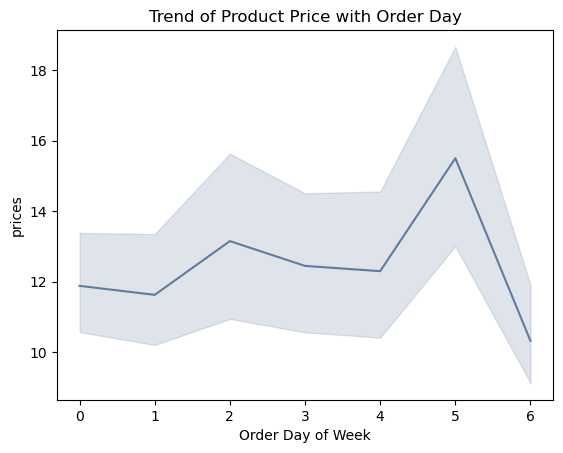

In [130]:
# Create line chart with random small sample data of the dataset

dow_price = sns.lineplot(data = small, x = 'orders_day_of_week',y = 'prices',color = '#5f7b9f')

plt.xlabel('Order Day of Week')  # Label for the x-axis
plt.title('Trend of Product Price with Order Day')  # Title of the bar chart

In [131]:
# Save figure
dow_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Line_dow_price.png'))

###  Product Price Range Insight

In [132]:
# Price range order count
ords_prods_merge['price_range_loc'].value_counts(dropna= False)

price_range_loc
Mid-range product     4373854
Low-range product     2023862
High-range product      83757
Name: count, dtype: int64

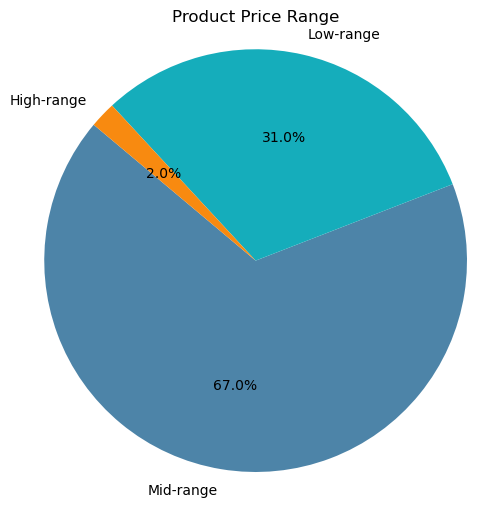

In [133]:

# Data for the pie chart
labels = ['Mid-range', 'Low-range', 'High-range']
sizes = [67, 31, 2]
colors = ['#4d84a8', '#15adbb', '#f88a10']

# Create a new figure for the pie chart
plt.figure(figsize=(6, 6))  

# Plot the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Ensure the pie chart is drawn as a circle
plt.axis('equal')

# Add a title to the pie chart
plt.title('Product Price Range')

# Show the plot
plt.show()

In [134]:
# Save figure
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Pie_price_range.png'))

<Figure size 640x480 with 0 Axes>

###  Customers' Favorite Products and Departments

Text(0, 0.5, ' ')

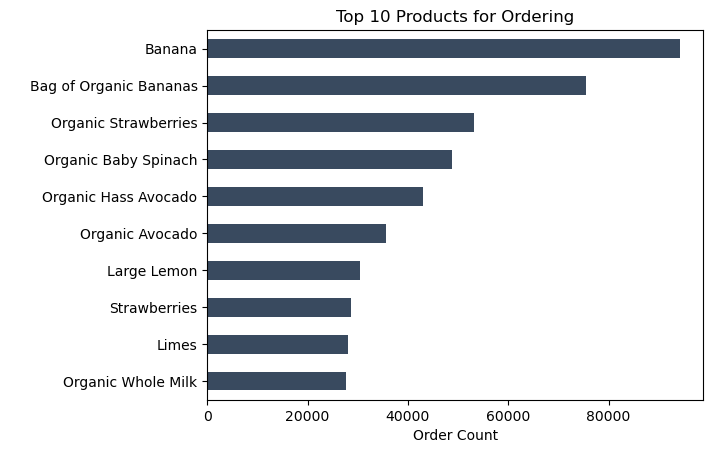

In [135]:
#Finding most popular products
favor_prod=ords_prods_merge['product_name'].value_counts(dropna=False).head(10).sort_values(ascending= True).plot.barh(color=['#394a5f'])
plt.title('Top 10 Products for Ordering') # Chart title
plt.xlabel('Order Count')  # Label for the x-axis
plt.ylabel(' ')  # Label for the y-axis

In [136]:
# Save figure
favor_prod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_favor_prod.png'))

In [137]:
# Finding most popular products
favor_dept=ords_prods_merge['department_id'].value_counts(dropna=False).head(10)

Text(0, 0.5, 'Department ID')

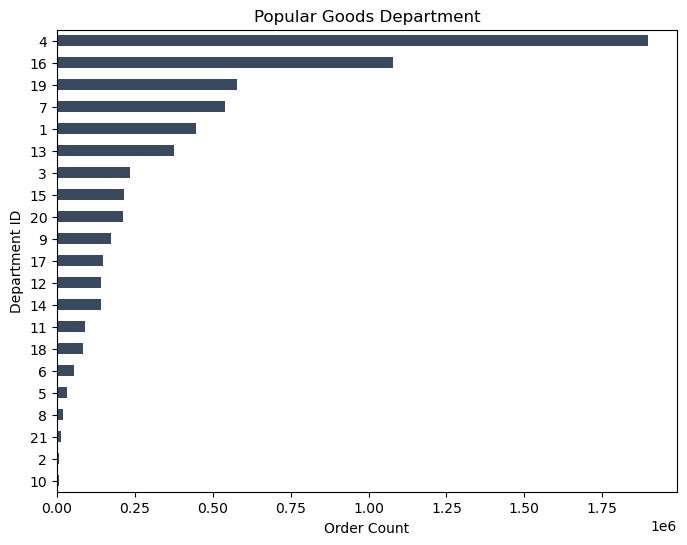

In [138]:
# Setting figure size
plt.figure(figsize=(8, 6))

#Finding most popular department
favor_dept=ords_prods_merge['department_id'].value_counts(dropna=False).sort_values(ascending= True).plot.barh(color=['#394a5f'])

plt.title('Popular Goods Department') # Chart title
plt.xlabel('Order Count')  # Label for the x-axis
plt.ylabel('Department ID')  # Label for the y-axis

In [139]:
# Save Figure
favor_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_department.png'))

###  Ordering Habbits Analysis

In [140]:
ordering_habits=ords_prods_merge['loyalty_flag'].value_counts(dropna=False).head(10)

Text(0.5, 0, ' ')

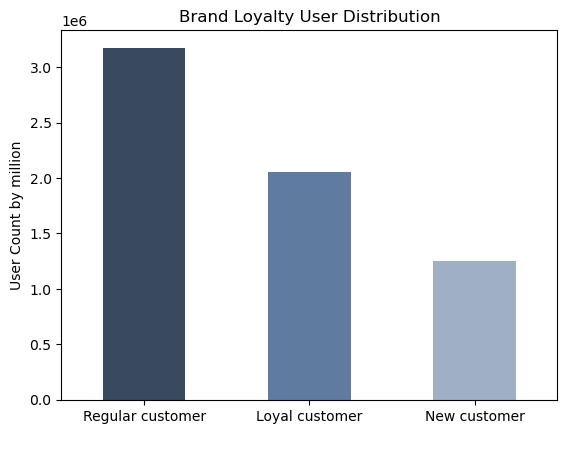

In [141]:
# Create bar chart for brand loyalty user count
ordering_habits=ords_prods_merge['loyalty_flag'].value_counts().plot.bar(color =['#394a5f', '#5f7b9f', '#9fb0c5'])

plt.xticks(rotation=0) # x-axis lable angle
plt.title('Brand Loyalty User Distribution') # Chart title
plt.ylabel('User Count by million')  # Label for the y-axis
plt.xlabel(' ') # Label for the x-axis



In [142]:
# Get the current figure associated with the Axes object
fig = ordering_habits.get_figure()

# Save the figure to a file
fig.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_user.png'))

### Ordering habbits base on loyalty status

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

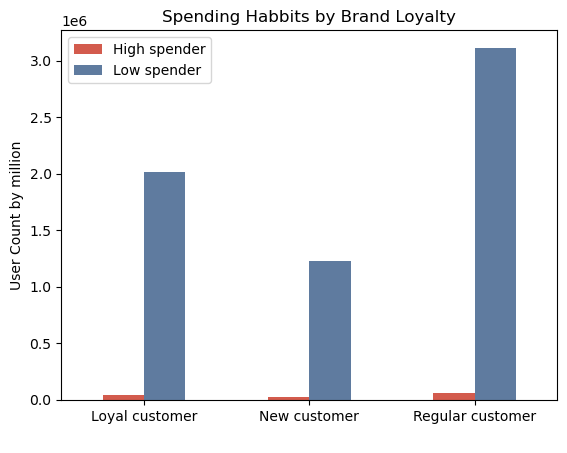

In [143]:
# Group spending flag by loyalty flag
grouped_counts = ords_prods_merge.groupby(['loyalty_flag', 'spending_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts=grouped_counts.plot(kind='bar', color=['#d35b4d','#5f7b9f'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count by million')
plt.title('Spending Habbits by Brand Loyalty')
plt.xticks(rotation=0)

In [144]:
# Get the current figure associated with the Axes object
fig = grouped_counts.get_figure()

In [145]:
fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_spending.png')) # Save figure

### Order frequency by loyalty status

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

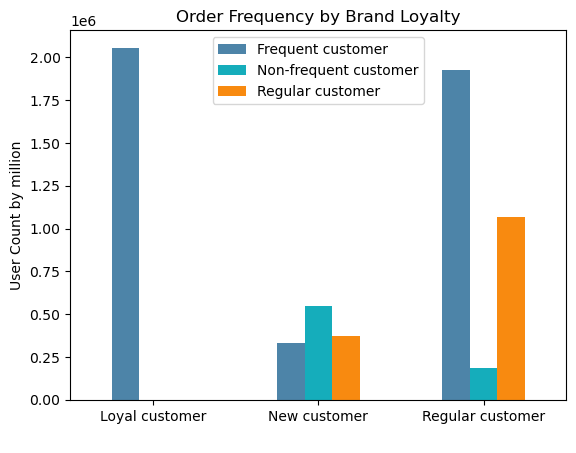

In [146]:
# Group frequency flag by loyalty flag
grouped_counts = ords_prods_merge.groupby(['loyalty_flag', 'order_frequency']).size().unstack()

# Plot the bar plot with color coding
grouped_counts=grouped_counts.plot(kind='bar', color=['#4d84a8', '#15adbb', '#f88a10','#df5d5c'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count by million')
plt.title('Order Frequency by Brand Loyalty')
plt.xticks(rotation=0)

In [147]:
# Get the current figure associated with the Axes object
fig = grouped_counts.get_figure()

In [148]:
fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_freqt.png')) # Save figure

### Customer activity by loyalty status

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

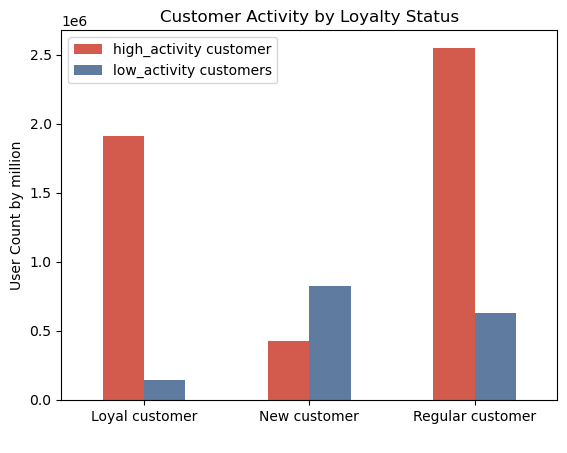

In [149]:
# Group customer activity by loyalty flag
grouped_counts = ords_prods_merge.groupby(['loyalty_flag', 'customer_activity']).size().unstack()

# Plot the bar plot with color coding
grouped_counts=grouped_counts.plot(kind='bar', color=['#d35b4d','#5f7b9f'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count by million')
plt.title('Customer Activity by Loyalty Status')
plt.xticks(rotation=0)

In [150]:
# Get the current figure associated with the Axes object
fig = grouped_counts.get_figure()

In [151]:
fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_act.png')) # Save figure

### Ordering habbits base on customer regions

In [152]:
# Create a subset to analyze customer ordering habbits.
user_ord_hab = ords_prods_merge[['user_id','region','Age','income','product_name','department_id','family_status','loyalty_flag','order_frequency','price_range_loc','spending_flag','orders_day_of_week','customer_activity','customer_profile']]

### Brand loyalty by region

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

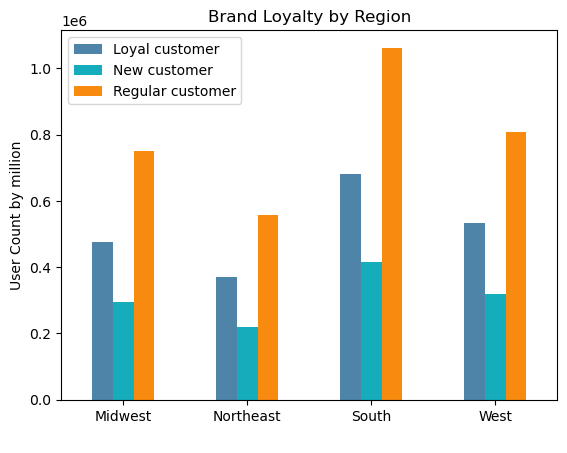

In [153]:
# Group loyalty flag by region
grouped_counts = user_ord_hab.groupby(['region', 'loyalty_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts= grouped_counts.plot(kind='bar', color=['#4d84a8', '#15adbb', '#f88a10','#df5d5c'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count by million')
plt.title('Brand Loyalty by Region')
plt.xticks(rotation=0)

In [154]:
# Get the current figure associated with the Axes object
fig = grouped_counts.get_figure()

In [155]:
fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_loy.png')) # Save figure

### Spending habbits by region

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

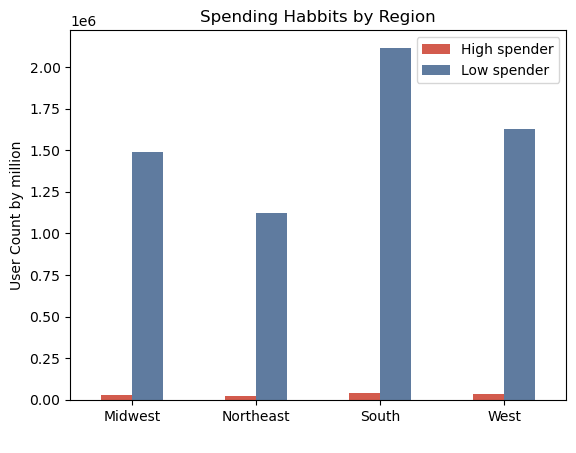

In [156]:
# Group spending flag by region
grouped_counts = user_ord_hab.groupby(['region', 'spending_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts =grouped_counts.plot(kind='bar', color=['#d35b4d','#5f7b9f'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count by million')
plt.title('Spending Habbits by Region')
plt.xticks(rotation=0)

In [157]:
# Get the current figure associated with the Axes object
fig = grouped_counts.get_figure()

In [158]:
fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_spd.png')) # Save figure

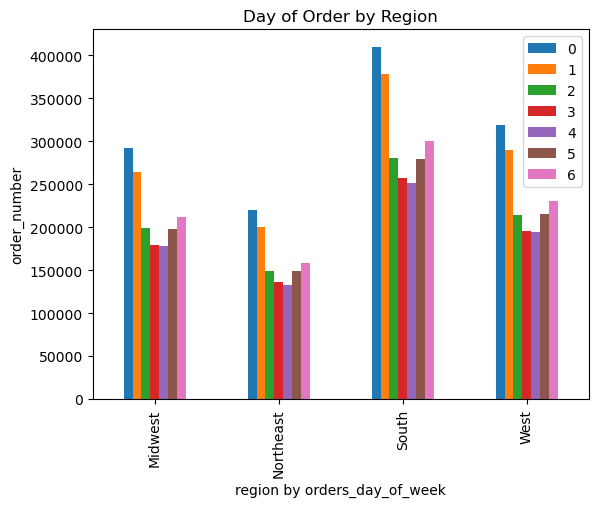

In [159]:
# Plotting
# Group spending flag by region
grouped_counts = user_ord_hab.groupby(['region', 'orders_day_of_week']).size().unstack()

# Plot the bar plot with color coding
grouped_counts =grouped_counts.plot(kind='bar')

plt.xlabel('region by orders_day_of_week')
plt.ylabel('order_number')
plt.title('Day of Order by Region')
plt.legend()
plt.show()

In [160]:
# Get the current figure associated with the Axes object
fig = grouped_counts.get_figure()

In [161]:
fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_day_order.png')) # Save figure

### Order frequency by region

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

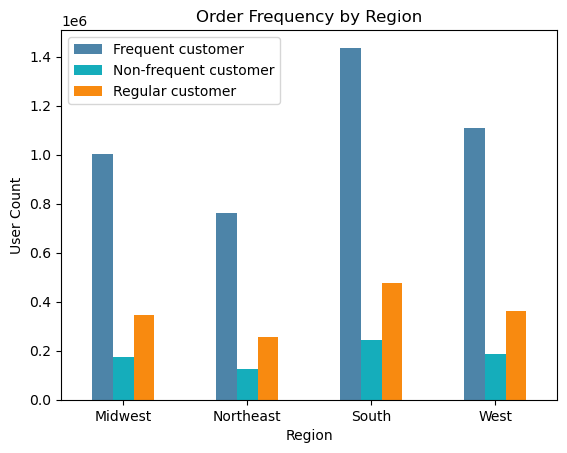

In [162]:


# Group order frequency by region
grouped_counts = user_ord_hab.groupby(['region', 'order_frequency']).size().unstack()
grouped_counts.columns = grouped_counts.columns.fillna('Unknown')

# Plot the bar plot with color coding
grouped_counts =grouped_counts.plot(kind='bar', color=['#4d84a8', '#15adbb', '#f88a10'])

# Add labels and title
plt.legend(title=None)
plt.xlabel('Region')  # Adding x-axis label
plt.ylabel('User Count')  # Adjusted y-axis label
plt.title('Order Frequency by Region')
plt.xticks(rotation=0)

In [163]:
# Get the current figure associated with the Axes object
fig = grouped_counts.get_figure()

In [164]:
fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_region_frqt.png')) # Save figure

### Ordering habbits base on age and family status

In [165]:
# Define age groups
# Define age groups
user_ord_hab.loc[(user_ord_hab['Age'] >= 18) & (user_ord_hab['Age'] <= 40) ,'age_profile'] = 'young adult'
user_ord_hab.loc[(user_ord_hab['Age'] > 40) & (user_ord_hab['Age'] <= 60) ,'age_profile'] = 'mid-age'
user_ord_hab.loc[(user_ord_hab['Age'] > 60) & (user_ord_hab['Age'] <= 81) ,'age_profile'] = 'senior'

C:\Users\DELL\AppData\Local\Temp\ipykernel_14404\4063859102.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_ord_hab.loc[(user_ord_hab['Age'] >= 18) & (user_ord_hab['Age'] <= 40) ,'age_profile'] = 'young adult'


(array([0, 1, 2]),
 [Text(0, 0, 'mid-age'), Text(1, 0, 'senior'), Text(2, 0, 'young adult')])

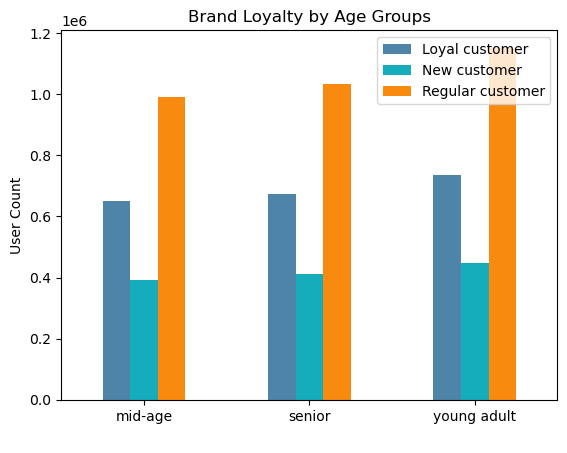

In [166]:
# Brand Loyalty by age groups

grouped_counts = user_ord_hab.groupby(['age_profile', 'loyalty_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts= grouped_counts.plot(kind='bar', color=['#4d84a8', '#15adbb', '#f88a10','#df5d5c'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Brand Loyalty by Age Groups')
plt.xticks(rotation=0)



In [167]:
# Get the current figure associated with the Axes object
fig = grouped_counts.get_figure()

In [168]:
fig.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_brand_loyality_age.png')) # Save figure

(array([0, 1, 2]),
 [Text(0, 0, 'mid-age'), Text(1, 0, 'senior'), Text(2, 0, 'young adult')])

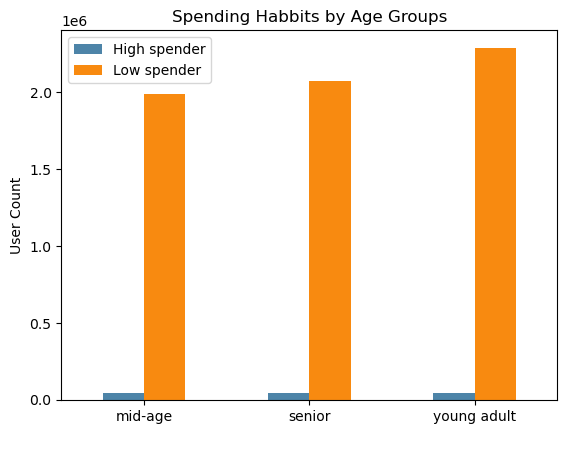

In [169]:
# Spending habit by age groups

grouped_counts = user_ord_hab.groupby(['age_profile', 'spending_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts= grouped_counts.plot(kind='bar', color=['#4d84a8', '#f88a10'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Spending Habbits by Age Groups')
plt.xticks(rotation=0)

In [170]:
# Get the current figure associated with the Axes object
fig = grouped_counts.get_figure()

In [171]:
fig.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_sped.png')) # Save figure

(array([0, 1, 2]),
 [Text(0, 0, 'mid-age'), Text(1, 0, 'senior'), Text(2, 0, 'young adult')])

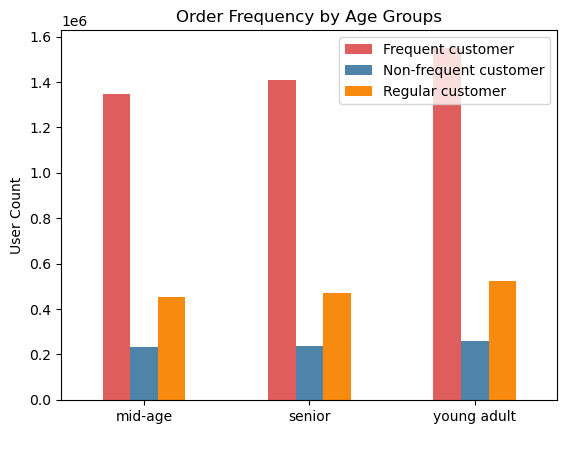

In [172]:
# Order frequency by age groups

grouped_counts = user_ord_hab.groupby(['age_profile', 'order_frequency']).size().unstack()

# Plot the bar plot with color coding
grouped_counts=grouped_counts.plot(kind='bar', color=['#df5d5c','#4d84a8', '#f88a10'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Order Frequency by Age Groups')
plt.xticks(rotation=0)

In [173]:
# Get the current figure associated with the Axes object
fig = grouped_counts.get_figure()

In [174]:
fig.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_freq.png')) # Save figure

(array([0, 1, 2, 3]),
 [Text(0, 0, 'divorced/widowed'),
  Text(1, 0, 'living with parents and siblings'),
  Text(2, 0, 'married'),
  Text(3, 0, 'single')])

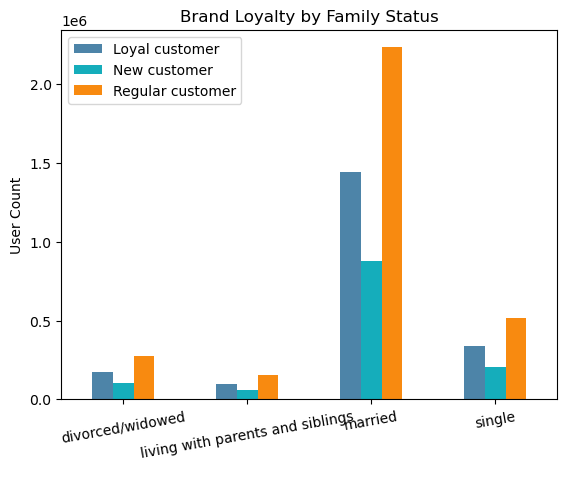

In [175]:
# Brand loyalty by famiy status

grouped_counts = user_ord_hab.groupby(['family_status', 'loyalty_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts=grouped_counts.plot(kind='bar', color=['#4d84a8', '#15adbb', '#f88a10'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Brand Loyalty by Family Status')
plt.xticks(rotation=10)

In [176]:
# Get the current figure associated with the Axes object
fig = grouped_counts.get_figure()

In [178]:
fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam_loyal.png')) # Save figure

(array([0, 1, 2, 3]),
 [Text(0, 0, 'divorced/widowed'),
  Text(1, 0, 'living with parents and siblings'),
  Text(2, 0, 'married'),
  Text(3, 0, 'single')])

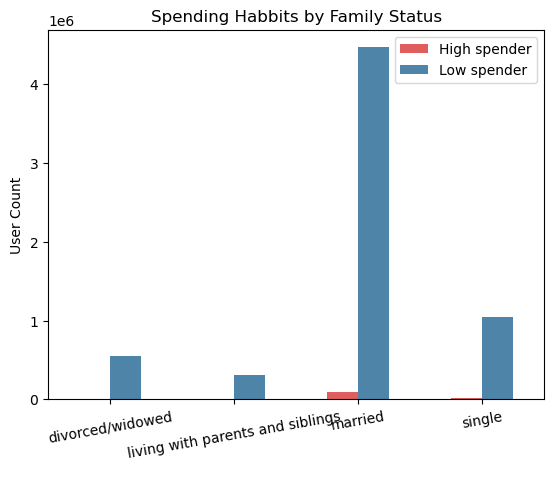

In [182]:
# Spending habbits by famiy status

grouped_counts = user_ord_hab.groupby(['family_status', 'spending_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts =grouped_counts.plot(kind='bar', color=['#df5d5c','#4d84a8', '#f88a10'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Spending Habbits by Family Status')
plt.xticks(rotation=10)


In [183]:
# Get the current figure associated with the Axes object
fig = grouped_counts.get_figure()

In [184]:
fig.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam_sped.png')) # Save figure

In [185]:
user_ord_hab.isnull().sum()

user_id               0
region                0
Age                   0
income                0
product_name          0
department_id         0
family_status         0
loyalty_flag          0
order_frequency       0
price_range_loc       0
spending_flag         0
orders_day_of_week    0
customer_activity     0
customer_profile      0
age_profile           0
dtype: int64

(array([0, 1, 2, 3]),
 [Text(0, 0, 'divorced/widowed'),
  Text(1, 0, 'living with parents and siblings'),
  Text(2, 0, 'married'),
  Text(3, 0, 'single')])

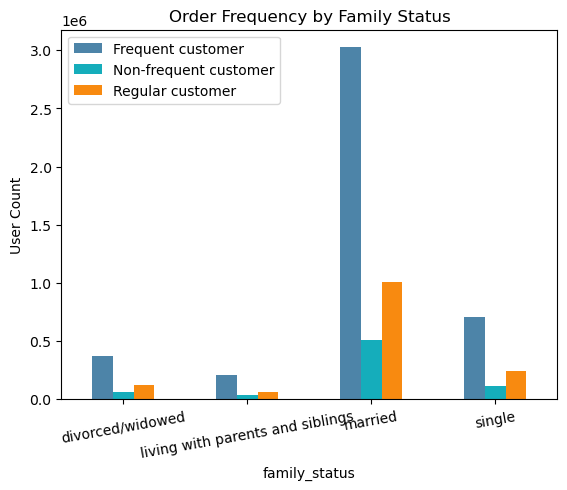

In [186]:
# Order frequency by famiy status

grouped_counts = user_ord_hab.groupby(['family_status', 'order_frequency']).size().unstack()
# Convert NaN values to a string representation
grouped_counts.columns = grouped_counts.columns.fillna('Unknown')

# Plot the bar plot with color coding
grouped_counts= grouped_counts.plot(kind='bar', color=['#4d84a8', '#15adbb', '#f88a10'])

# Add labels and title
plt.legend(title=None)
plt.xlabel('family_status')
plt.ylabel('User Count')
plt.title('Order Frequency by Family Status')
plt.xticks(rotation=10)

In [187]:
# Get the current figure associated with the Axes object
fig = grouped_counts.get_figure()

In [188]:
fig.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_fam_freq.png')) # Save figure

In [189]:
# Define income groups
user_ord_hab.loc[(user_ord_hab['income'] < 62636) ,'income_profile'] = 'low-income'
user_ord_hab.loc[(user_ord_hab['income'] >=62636) & (user_ord_hab['income'] < 95450) ,'income_profile'] = 'lower-middle-class'
user_ord_hab.loc[(user_ord_hab['income'] >= 95450) & (user_ord_hab['income'] < 133392) ,'income_profile'] = 'upper-middle-class'
user_ord_hab.loc[(user_ord_hab['income'] >= 133392) ,'income_profile'] = 'upper-class'

C:\Users\DELL\AppData\Local\Temp\ipykernel_14404\3800384968.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_ord_hab.loc[(user_ord_hab['income'] < 62636) ,'income_profile'] = 'low-income'


(array([0, 1, 2, 3]),
 [Text(0, 0, 'low-income'),
  Text(1, 0, 'lower-middle-class'),
  Text(2, 0, 'upper-class'),
  Text(3, 0, 'upper-middle-class')])

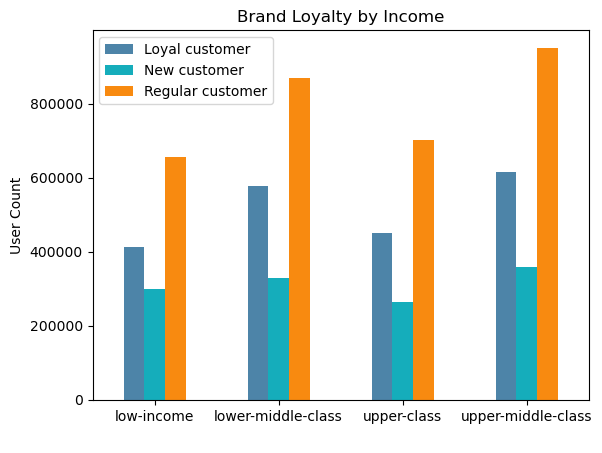

In [190]:
# Brand loyalty by income profile

grouped_counts = user_ord_hab.groupby(['income_profile', 'loyalty_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts =grouped_counts.plot(kind='bar', color=['#4d84a8', '#15adbb', '#f88a10'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Brand Loyalty by Income')
plt.xticks(rotation=0)

In [191]:
# Get the current figure associated with the Axes object
fig = grouped_counts.get_figure()

In [192]:
fig.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_in_loyal.png')) # Save figure

(array([0, 1, 2, 3]),
 [Text(0, 0, 'low-income'),
  Text(1, 0, 'lower-middle-class'),
  Text(2, 0, 'upper-class'),
  Text(3, 0, 'upper-middle-class')])

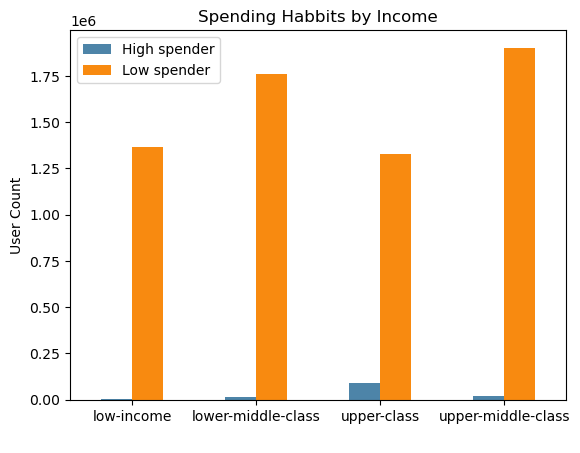

In [193]:
# Spending habbits by income profile

grouped_counts = user_ord_hab.groupby(['income_profile', 'spending_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts= grouped_counts.plot(kind='bar', color=['#4d84a8',  '#f88a10'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Spending Habbits by Income')
plt.xticks(rotation=0)

In [194]:
# Get the current figure associated with the Axes object
fig = grouped_counts.get_figure()

In [195]:
fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_spending.png')) # Save figure

(array([0, 1, 2, 3]),
 [Text(0, 0, 'low-income'),
  Text(1, 0, 'lower-middle-class'),
  Text(2, 0, 'upper-class'),
  Text(3, 0, 'upper-middle-class')])

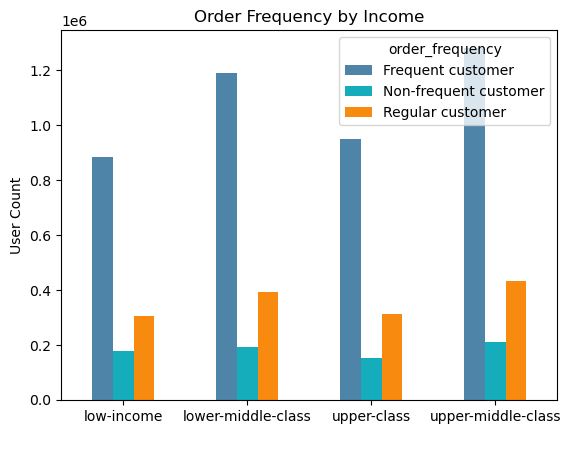

In [196]:
# Order frequency by income profile

grouped_counts = user_ord_hab.groupby(['income_profile', 'order_frequency']).size().unstack()


# Plot the bar plot with color coding
grouped_counts=grouped_counts.plot(kind='bar', color=['#4d84a8', '#15adbb', '#f88a10'])

# Add labels and title
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Order Frequency by Income')
plt.xticks(rotation=0)

In [197]:
# Get the current figure associated with the Axes object
fig = grouped_counts.get_figure()

In [198]:
fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'incomebar__freq.png')) # Save figure

#### According to data above, the target segment is define as married, middle class young adult.

In [199]:
# Define target segment 
Target_segment = user_ord_hab.loc[
    (user_ord_hab['age_profile'] == 'young adult') & 
    ((user_ord_hab['income_profile'] == 'upper-middle-class') | (user_ord_hab['income_profile'] == 'lower-middle-class')) & 
    (user_ord_hab['family_status'] == 'married')]

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '4'),
  Text(1, 0, '16'),
  Text(2, 0, '19'),
  Text(3, 0, '7'),
  Text(4, 0, '1')])

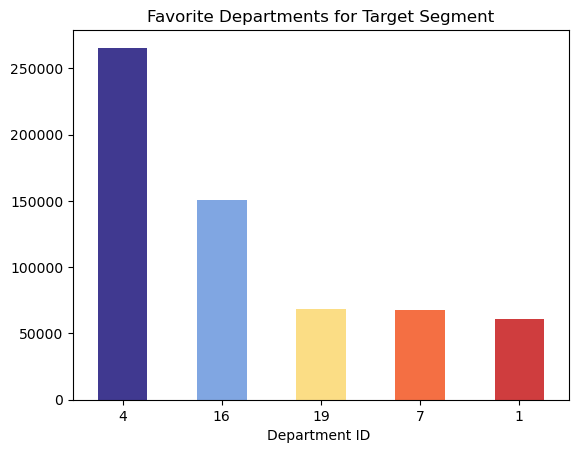

In [200]:
# The popular departments for the target segment
Target_segment=Target_segment['department_id'].value_counts().sort_values(ascending= False ).head(5).plot(kind='bar', color=['#403990', '#80a6e2', '#fbdd85','#f46f43','#cf3d3e'])
plt.xticks(rotation=0)


# Add labels and title
plt.xlabel('Department ID ')
plt.title('Favorite Departments for Target Segment')
plt.xticks(rotation=0)

In [201]:
# Get the current figure associated with the Axes object
fig = Target_segment.get_figure()

In [202]:
fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_faovr_dept_target.png')) # Save figure

#### Department 4 and 16 have the most order by target segment. Department 4 is produce and department 16 is dairy eggs.

### Ordering habbits base on customer profile

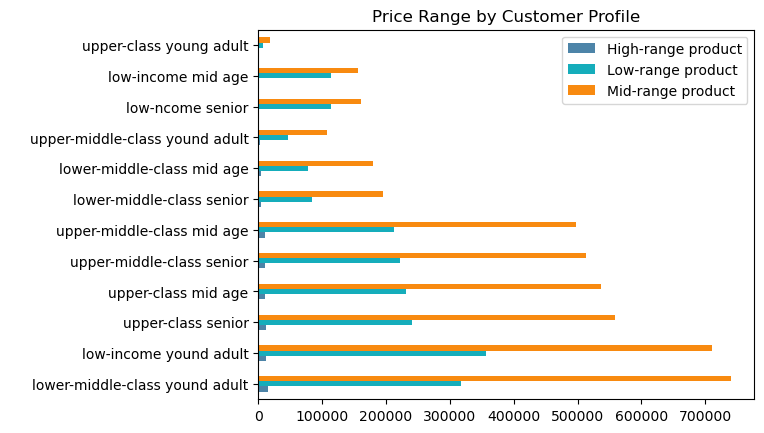

In [203]:
# Group price range order by customer profile
grouped_counts = user_ord_hab.groupby(['customer_profile', 'price_range_loc']).size().unstack().sort_values(by= 'High-range product', ascending = False)

# Plot in to chart
grouped_counts= grouped_counts.plot(kind='barh', color = ['#4d84a8','#15adbb','#f88a10'])

# Add labels and title
plt.ylabel(' ')
plt.title('Price Range by Customer Profile')
plt.legend(title =None)

In [204]:
# Get the current figure associated with the Axes object
fig = grouped_counts.get_figure()

In [215]:
fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_cus_pro.png')) # Save figure

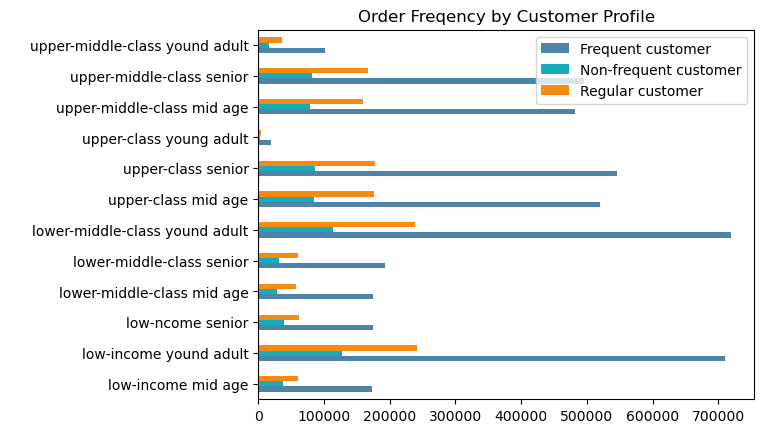

In [206]:
# Group price range order by customer profile
grouped_counts = user_ord_hab.groupby(['customer_profile', 'order_frequency']).size().unstack() 

# Plot in to chart
grouped_counts=grouped_counts.plot(kind='barh', color = ['#4d84a8','#15adbb','#f88a10'])

# Add labels and title
plt.ylabel(' ')
plt.title('Order Freqency by Customer Profile')
plt.legend(title =None)

In [207]:
# Get the current figure associated with the Axes object
fig = grouped_counts.get_figure()

In [216]:
fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_freqt_cus_pro.png')) # Save figure

### The product order base on customer profile

Text(0.5, 1.0, 'Popular Department by Customer Profile')

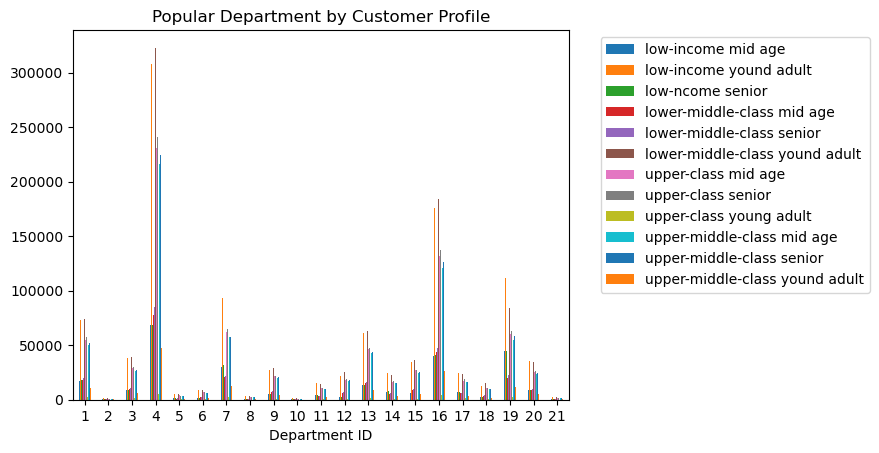

In [209]:
# Group customer profile by department id
grouped_counts = user_ord_hab.groupby(['department_id', 'customer_profile']).size().unstack() 

# Plot in to chart
grouped_counts=grouped_counts.plot(kind='bar')

# Add label and title
plt.legend(title=None, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xlabel('Department ID')
plt.title('Popular Department by Customer Profile')

In [210]:
# Get the current figure associated with the Axes object
fig = grouped_counts.get_figure()

In [211]:
fig.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prod_cust.png')) # Save figure

In [212]:
# Create a Crosstab of Region and Spending Flag
spending_by_region = pd.crosstab(ords_prods_merge['region'], ords_prods_merge['spending_flag'], dropna = False)

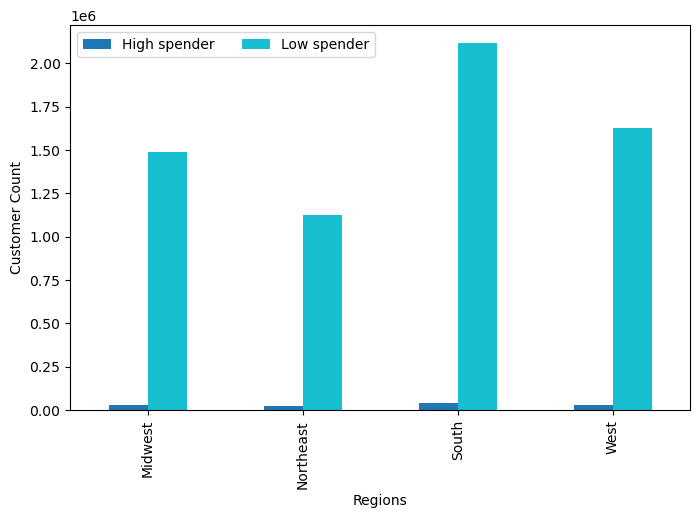

In [213]:
spending_by_region.plot(kind='bar', 
                    colormap='tab10', 
                    figsize=(8,5))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Regions")
plt.ylabel('Customer Count')


   
plt.show()

In [214]:
spending_by_region.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_spending_by_region.png')) # Save figure

AttributeError: 'DataFrame' object has no attribute 'savefig'

In [ ]:
# Plotting the bar chart
ax = spending_by_region.plot(kind='bar', 
                             colormap='tab10', 
                             figsize=(8,5))

# Adding spending values on top of each bar
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Regions")
plt.ylabel('Spending')

plt.show()